# Linear regression and stochastic gradient descent

The task is based on lecture materials on linear regression and gradient descent. We will forecast a company's revenue based on its investment in TV, newspaper, and radio advertising.

Linear regression is one of the most well-studied machine learning methods that allows you to predict the values of a quantitative feature as a linear combination of other features with parameters - model weights. Optimal (in the sense of minimality of some error functional) linear regression parameters can be found analytically using the normal equation or numerically using optimization methods. 

Linear regression uses a simple quality functional - the standard error. We will work with a sample containing 3 features. To adjust the parameters (weights) of the model, the following problem is solved:
$$\Large \frac{1}{\ell}\sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}^2} \rightarrow \min_{w_0, w_1, w_2, w_3},$$
where $x_{i1}, x_{i2}, x_{i3}$ - feature values $i$ object, $y_i$ - target values $i$ object, $\ell$ - number of objects in train set.

## Gradient descent
The parameters $w_0, w_1, w_2, w_3$, over which the mean square error is minimized, can be found numerically using gradient descent.
The gradient step for the weights will look like this:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}},\ j \in \{1,2,3\}$$


## Stochastic Gradient Descent
The problem with gradient descent as described above is that, on large samples, it can be very computationally difficult to calculate the gradient over all available data at each step.
In the stochastic variant of gradient descent, corrections for weights are calculated only taking into account one randomly taken object of the training sample:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} {((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} {x_{kj}((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)},\ j \in \{1,2,3\},$$
where $k$ - random index, $k \in \{1, \ldots, \ell\}$.

## Tasks

**1. Upload data from *advertising.csv* in the pandas DataFrame. [Source](http://www-bcf.usc.edu/~gareth/ISL/data.html).**

In [27]:
import pandas as pd
adver_data = pd.read_csv('D:\Python\Advertising.csv')

**Check first 5 lines and statisctics of this dataset.**

In [19]:
adver_data.head(n=5)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


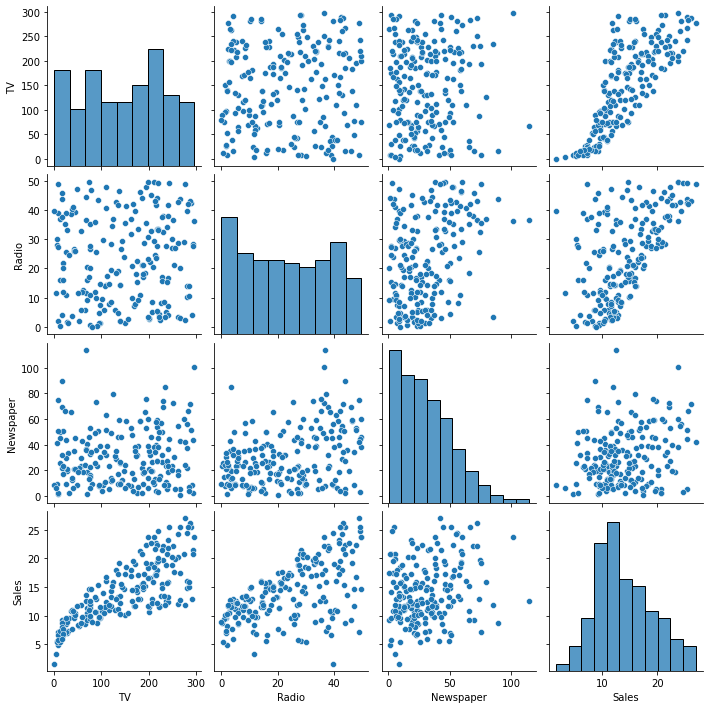

In [7]:
import seaborn as sns
sns.pairplot(adver_data)

**Create NumPy array *X* from the columns TV, Radio и Newspaper and *y* - from the column Sales.**

In [28]:
X = adver_data.values[:, range(0,3)]
y = adver_data.values[:, 3]

**Standartize data in X**

In [29]:
import numpy as np

print(adver_data['TV'].mean()) # сравнение 2х методово вычисления среднего по столбцу 0
print(np.mean(X[:,0],axis=0))

for i in range(0,3):
    means, stds = np.mean(X[:,i],axis=0), np.std(X[:,i],axis=0)
    for j in range(0,len(X)):
        X[j,i]=(X[j,i]-means)/float(stds) #нормируем данные




147.0425
147.0425


In [10]:
print(X[:5])

[[ 0.96985227  0.98152247  1.77894547]
 [-1.19737623  1.08280781  0.66957876]
 [-1.51615499  1.52846331  1.78354865]
 [ 0.05204968  1.21785493  1.28640506]
 [ 0.3941822  -0.84161366  1.28180188]]


**Add to *X* column which consists of 1. It is needed in order not to calculate separately coefficient $w_0$ of lineal regression.**

In [30]:
X = np.c_[X,(np.ones(len(adver_data)))]
#X=np.hstack((X,np.ones(X.shape[0]).reshape((X.shape[0],1))))
print(X[:5])
X.shape

[[ 0.96985227  0.98152247  1.77894547  1.        ]
 [-1.19737623  1.08280781  0.66957876  1.        ]
 [-1.51615499  1.52846331  1.78354865  1.        ]
 [ 0.05204968  1.21785493  1.28640506  1.        ]
 [ 0.3941822  -0.84161366  1.28180188  1.        ]]


(200, 4)

**2. Realize *mserror* - mean square error of the forecast.**

In [31]:
def mserror(y, y_pred):
   # return np.sqrt((((y - y_pred) ** 2).sum())/float(len(y)))
    return ((((y - y_pred) ** 2).sum())/float(len(y)))
# считаем квадраты отклонения , суммируем их и делим на длину вектора

**What is the standard error of predicting Sales values if you always predict the median value of Sales for the original sample? The result, rounded to 3 decimal places, is the answer to *'1 task'.***

In [32]:
answer1 = mserror(y,np.median(y))

print("Mean sales ", np.median(y))
print(round(answer1, 3))

Mean sales  12.9
28.346


**3. Implement a *normal_equation* function that, given matrices (NumPy arrays) *X* and *y*, calculates the weight vector $w$ according to the normal linear regression equation.**

In [33]:
def normal_equation(X, y):
    a = np.dot(X.T, X) # преобразуем левую часть
    b = np.dot(X.T, y) # преобразуем правую часть
    res = np.linalg.solve(a, b) # решаем систему
    return res
    #return np.linalg.inv  # Ваш код здесь

In [34]:
norm_eq_weights = normal_equation(X, y)
print(norm_eq_weights)

[ 3.91925365  2.79206274 -0.02253861 14.0225    ]


**Which sales are predicted by a linear model with weights found using the normal equation in the case of average investment in TV, radio and newspaper advertising? (that is, with zero values of the scaled TV, Radio, and Newspaper features). The result obtained, rounded to 3 decimal places, is the answer to *'2 task'*.**

In [36]:
answer2 = np.dot(np.array([0,0,0,1]).T,norm_eq_weights)
print(round(answer2, 3))

14.023


**4. Write a *linear_prediction* function that takes an *X* matrix and *w* linear model weight vector as input, and returns a prediction vector as a linear combination of *X* matrix columns with *w* weights.**

In [37]:
def linear_prediction(X, w):
    return np.dot(X,w)

**What is the standard error of predicting Sales as a linear model with weights found using the normal equation?
The result, rounded to 3 decimal places, is the answer to *'3 task'***

In [39]:
answer3 = mserror(y,linear_prediction(X,norm_eq_weights))
print(round(answer3, 4))

2.7841


**5. Write a *stochastic_gradient_step* function that implements a stochastic gradient descent step for linear regression. The function must accept a matrix *X*, vectors *y* and *w*, a number *train_ind* - the index of the training sample object (rows of the *X* matrix), by which the change in weights is calculated, as well as the number *$\eta$* ( eta) - gradient descent step (default *eta*=0.01). The result will be a vector of updated weights. Our function implementation will be explicitly written for data with 3 features, but it's easy to modify for any number of features, you can do it.**

In [40]:
def stochastic_gradient_step(X, y, w, train_ind, eta=0.01):
    N = X.shape[0]                   # всего обьектов (нормировка)
    x = X[train_ind]                 # текуший случайный k обьект 
    y_pred = linear_prediction(x, w) # предсказание для к случайного обьекта 
    rs = (y_pred - y[train_ind])     # регрессионый остаток для k обьекта 
    
    grad0 = 2.0/N*x[0]*rs
    grad1 = 2.0/N*x[1]*rs
    grad2 = 2.0/N*x[2]*rs
    grad3 = 2.0/N*x[3]*rs
    return  w - eta * np.array([grad0, grad1, grad2, grad3])

**6. Write a *stochastic_gradient_descent* function that implements stochastic gradient descent for linear regression.**


**At each iteration, the current value of the root mean square error must be written to the vector (list). The function must return the vector of weights $w$, as well as the vector (list) of errors.**

In [41]:
def stochastic_gradient_descent(X, y, w_init, eta=1e-2, max_iter=1e4,
                                min_weight_dist=1e-8, seed=42, verbose=False):
     
    weight_dist = np.inf
    
    w = w_init
    
    errors = []
   
    iter_num = 0
    
    np.random.seed(seed)
        
    while weight_dist > min_weight_dist and iter_num < max_iter:
        
        random_ind = np.random.randint(X.shape[0])
        
       
        new_w = stochastic_gradient_step(X, y, w, random_ind, eta)
        
        
        error = mserror(y, linear_prediction(X, new_w))
        errors.append(error)
        
        weight_dist = np.linalg.norm(w-new_w)
        w = new_w
        iter_num += 1
    print(weight_dist) 
        
    return w, errors

**Run $10^5$ iterations of stochastic gradient descent. Specify a vector of initial weights *w_init* consisting of zeros. Leave the *eta* and *seed* parameters at their default values (*eta*=0.01, *seed*=42 - this is important for checking answers).**

In [42]:
%%time
stoch_grad_desc_weights, stoch_errors_by_iter = stochastic_gradient_descent(X, y, [1,1,1,1],max_iter=1e5)             
print(stoch_grad_desc_weights)

8.386229298781748e-09
[3.88959924e+00 2.78245131e+00 4.24880223e-03 1.39928668e+01]
Wall time: 1.68 s


**Let's see what the error is in the first 50 iterations of stochastic gradient descent. We see that the error does not necessarily decrease on each iteration.**

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'MSE')

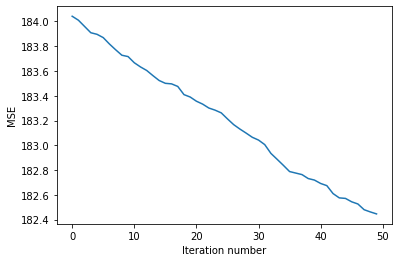

In [43]:
%pylab inline
plot(range(50), stoch_errors_by_iter[:50])
xlabel('Iteration number')
ylabel('MSE')

**Now let's look at the dependence of the error on the iteration number for $10^5$ iterations of stochastic gradient descent. We see that the algorithm converges.**

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'MSE')

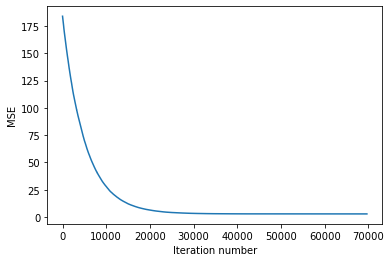

In [44]:
%pylab inline
plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter)
xlabel('Iteration number')
ylabel('MSE')

**The weight vector that the method converged to.**

In [45]:
stoch_grad_desc_weights

array([3.88959924e+00, 2.78245131e+00, 4.24880223e-03, 1.39928668e+01])

**The rms error at the last iteration.**

In [46]:
stoch_errors_by_iter[-1]

2.7864526792248374

**What is the standard error of predicting Sales as a linear model with weights found using gradient descent? The result obtained, rounded to 3 decimal places, is the answer to *'4 task'*.**

In [47]:
answer4 = mserror(y,linear_prediction(X,stoch_grad_desc_weights))
print(round(answer4, 3))

2.786
